# Modelling 3

# Installing packages

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing dataframe

df_final data frame has both explanatory variables which are encoded with binary coding for multiple choice questions and ordinal encoding for single choice questions and the target variable which is label encoded.


In [2]:
df_final = pd.read_csv('df_final.csv',low_memory = False)
df_final = df_final.drop('Unnamed: 0', axis = 1).reset_index(drop = True)
df_final

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,target
0,3,0,3,4,9,2,0,2,1,1,...,0,0,1,0,0,0,0,0,0,3
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,9
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,0,0,3,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13190,0,0,6,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13191,3,0,3,5,9,2,7,4,1,0,...,0,0,0,0,0,0,0,0,0,8
13192,1,0,0,3,9,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,9


# Strategy 1

In Strategy 1, all the jobs were included for the analysis


In [174]:
X = df_final.drop('target', axis = 1)
y = df_final.target

# Train, test split

Here, 90% of the data used as train data whereas 10% used as test data.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Resampling techniques for imbalanced data



In [5]:
##Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
y_ro.value_counts()
print('Classes oversampled :', y_ro.value_counts())

Classes oversampled : 5     3119
4     3119
7     3119
9     3119
6     3119
2     3119
3     3119
10    3119
0     3119
1     3119
8     3119
Name: target, dtype: int64


In [6]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ro = []
test_score_ro = []
class_report_ro =pd.DataFrame()

for name, model in models:
    model.fit(X_ro, y_ro)
    train_accuracy= accuracy_score(y_ro, model.predict(X_ro))
    train_score_ro.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ro.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)  
    class_report_ro = class_report_ro.append(class_report.iloc[:3,:11])
results_ro_train = pd.DataFrame(train_score_ro, columns = ['Model', 'Ro_train'])
results_ro_test = pd.DataFrame(test_score_ro, columns = ['Model', 'Ro_test'])
results_ro = pd.merge(results_ro_train, results_ro_test, on='Model')
print(results_ro)
print(class_report_ro)

  Model  Ro_train   Ro_test
0    LR  0.429567  0.332576
1   KNN  0.831298  0.240909
2    DT  0.985164  0.281061
3    RF  0.985164  0.410606
4   SVM  0.550905  0.365152
                  0         1         2         3         4         5  \
precision  0.172043  0.025974  0.317460  0.163043  0.580952  0.245161   
recall     0.173913  0.181818  0.258065  0.312500  0.410774  0.383838   
f1-score   0.172973  0.045455  0.284698  0.214286  0.481262  0.299213   
precision  0.132184  0.000000  0.198020  0.089744  0.571429  0.151515   
recall     0.250000  0.000000  0.258065  0.145833  0.350168  0.202020   
f1-score   0.172932  0.000000  0.224090  0.111111  0.434238  0.173160   
precision  0.172414  0.062500  0.236842  0.102041  0.420561  0.212963   
recall     0.163043  0.090909  0.232258  0.104167  0.454545  0.232323   
f1-score   0.167598  0.074074  0.234528  0.103093  0.436893  0.222222   
precision  0.194444  0.000000  0.287179  0.181818  0.451613  0.300971   
recall     0.076087  0.000000

In [7]:
##SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [8]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_sm = []
test_score_sm= []
class_report_sm = pd.DataFrame()

for name, model in models:
    model.fit(X_sm, y_sm)
    train_accuracy= accuracy_score(y_sm, model.predict(X_sm))
    train_score_sm.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_sm.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)  
    class_report_sm = class_report_sm.append(class_report.iloc[:3,:11])
results_sm_train = pd.DataFrame(train_score_sm, columns = ['Model', 'Smote_train'])
results_sm_test = pd.DataFrame(test_score_sm, columns = ['Model', 'Smote_test'])
results_sm = pd.merge(results_sm_train, results_sm_test, on='Model')
print(results_sm)
print(class_report_sm)


  Model  Smote_train  Smote_test
0    LR     0.431811    0.375000
1   KNN     0.788714    0.226515
2    DT     0.963333    0.286364
3    RF     0.963333    0.418182
4   SVM     0.504853    0.400000
                  0         1         2         3         4         5  \
precision  0.183333  0.038462  0.333333  0.181818  0.496667  0.270492   
recall     0.119565  0.181818  0.303226  0.208333  0.501684  0.333333   
f1-score   0.144737  0.063492  0.317568  0.194175  0.499162  0.298643   
precision  0.143750  0.000000  0.175141  0.084034  0.647482  0.189542   
recall     0.250000  0.000000  0.200000  0.208333  0.303030  0.292929   
f1-score   0.182540  0.000000  0.186747  0.119760  0.412844  0.230159   
precision  0.135135  0.090909  0.296774  0.105263  0.452107  0.181818   
recall     0.163043  0.181818  0.296774  0.125000  0.397306  0.202020   
f1-score   0.147783  0.121212  0.296774  0.114286  0.422939  0.191388   
precision  0.142857  0.000000  0.315436  0.333333  0.484694  0.291339   

In [9]:
##ADASYN
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)
print('Classes ADASYN :', y_ad.value_counts())

Classes ADASYN : 8     3417
5     3360
9     3243
4     3119
10    3094
1     3094
0     3080
2     3076
6     3057
3     2991
7     2922
Name: target, dtype: int64


In [10]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ad = []
test_score_ad= []
class_report_ad = pd.DataFrame()

for name, model in models:
    model.fit(X_ad, y_ad)
    train_accuracy= accuracy_score(y_ad, model.predict(X_ad))
    train_score_ad.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ad.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)  
    class_report_ad = class_report_ad.append(class_report.iloc[:3,:11])  
results_ad_train = pd.DataFrame(train_score_ad, columns = ['Model', 'Adasyn_train'])
results_ad_test = pd.DataFrame(test_score_ad, columns = ['Model', 'Adasyn_test'])
results_ad = pd.merge(results_ad_train, results_ad_test, on='Model')
print(results_ad)
print(class_report_ad)

  Model  Adasyn_train  Adasyn_test
0    LR      0.417525     0.367424
1   KNN      0.792268     0.244697
2    DT      0.959713     0.275000
3    RF      0.959713     0.399242
4   SVM      0.485850     0.401515
                  0         1         2         3         4         5  \
precision  0.183333  0.038462  0.340741  0.192982  0.496296  0.252033   
recall     0.119565  0.181818  0.296774  0.229167  0.451178  0.313131   
f1-score   0.144737  0.063492  0.317241  0.209524  0.472663  0.279279   
precision  0.127168  0.000000  0.193750  0.098039  0.653061  0.193939   
recall     0.239130  0.000000  0.200000  0.208333  0.323232  0.323232   
f1-score   0.166038  0.000000  0.196825  0.133333  0.432432  0.242424   
precision  0.132075  0.090909  0.163265  0.034483  0.494424  0.205357   
recall     0.152174  0.272727  0.154839  0.041667  0.447811  0.232323   
f1-score   0.141414  0.136364  0.158940  0.037736  0.469965  0.218009   
precision  0.203704  0.200000  0.318750  0.241379  0.454315 

# Performances on Train and Test Set

In [11]:
model_evaluation_df = pd.concat([results_ro, results_sm, results_ad], axis = 1)
model_evaluation_df = model_evaluation_df.loc[:,~model_evaluation_df.columns.duplicated()]
model_evaluation_df.set_index('Model')

,Ro_train,Ro_test,Smote_train,Smote_test,Adasyn_train,Adasyn_test
Model,,,,,,
LR,0.429567,0.332576,0.431811,0.375000,0.417525,0.367424
KNN,0.831298,0.240909,0.788714,0.226515,0.792268,0.244697
DT,0.985164,0.281061,0.963333,0.286364,0.959713,0.275000
RF,0.985164,0.410606,0.963333,0.418182,0.959713,0.399242
SVM,0.550905,0.365152,0.504853,0.400000,0.485850,0.401515


Random Forest performs well when the Random oversampling technique is used. But this model doesn't perform well in test data because of overfitting.

# Classification Report


**Precision** **Scores**

In [12]:
classifications = [class_report_ro, class_report_sm, class_report_ad]
technique = ['Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.',
            'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
            'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN']
reports_prec = pd.DataFrame()
for report in classifications:
    precision = report.loc['precision'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_prec = reports_prec.append(precision)
reports_prec['technique'] = technique
reports_prec


,0,1,2,3,4,5,6,7,8,9,10,technique
LR,0.172043,0.025974,0.317460,0.163043,0.580952,0.245161,0.467290,0.095890,0.370968,0.580000,0.141593,Random oversamp.
KNN,0.132184,0.000000,0.198020,0.089744,0.571429,0.151515,0.268456,0.092437,0.254717,0.371429,0.125000,Random oversamp.
DT,0.172414,0.062500,0.236842,0.102041,0.420561,0.212963,0.263473,0.112360,0.285714,0.349727,0.166667,Random oversamp.
RF,0.194444,0.000000,0.287179,0.181818,0.451613,0.300971,0.433333,0.107143,0.510638,0.512195,0.363636,Random oversamp.
SVM,0.146789,0.097561,0.316901,0.197368,0.659898,0.254237,0.455285,0.170213,0.423729,0.585526,0.175824,Random oversamp.
LR,0.183333,0.038462,0.333333,0.181818,0.496667,0.270492,0.437500,0.094340,0.417391,0.526570,0.200000,SMOTE
KNN,0.143750,0.000000,0.175141,0.084034,0.647482,0.189542,0.239669,0.064220,0.330435,0.447368,0.094118,SMOTE
DT,0.135135,0.090909,0.296774,0.105263,0.452107,0.181818,0.283422,0.077922,0.310924,0.388571,0.152174,SMOTE
RF,0.142857,0.000000,0.315436,0.333333,0.484694,0.291339,0.450000,0.153846,0.481818,0.542373,0.307692,SMOTE
SVM,0.278689,0.076923,0.341772,0.205882,0.496914,0.299145,0.431138,0.152542,0.415842,0.546296,0.192982,SMOTE


**Recall**

In [13]:
reports_recall = pd.DataFrame()
for report in classifications:
    recall = report.loc['recall'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_recall = reports_recall.append(recall)
reports_recall['technique'] = technique
reports_recall

,0,1,2,3,4,5,6,7,8,9,10,technique
LR,0.173913,0.181818,0.258065,0.312500,0.410774,0.383838,0.289017,0.116667,0.348485,0.393665,0.50000,Random oversamp.
KNN,0.250000,0.000000,0.258065,0.145833,0.350168,0.202020,0.231214,0.183333,0.204545,0.176471,0.21875,Random oversamp.
DT,0.163043,0.090909,0.232258,0.104167,0.454545,0.232323,0.254335,0.166667,0.242424,0.289593,0.18750,Random oversamp.
RF,0.076087,0.000000,0.361290,0.041667,0.659933,0.313131,0.375723,0.050000,0.363636,0.570136,0.25000,Random oversamp.
SVM,0.173913,0.363636,0.290323,0.312500,0.437710,0.454545,0.323699,0.266667,0.378788,0.402715,0.50000,Random oversamp.
LR,0.119565,0.181818,0.303226,0.208333,0.501684,0.333333,0.404624,0.083333,0.363636,0.493213,0.34375,SMOTE
KNN,0.250000,0.000000,0.200000,0.208333,0.303030,0.292929,0.167630,0.116667,0.287879,0.153846,0.25000,SMOTE
DT,0.163043,0.181818,0.296774,0.125000,0.397306,0.202020,0.306358,0.100000,0.280303,0.307692,0.21875,SMOTE
RF,0.086957,0.000000,0.303226,0.166667,0.639731,0.373737,0.364162,0.100000,0.401515,0.579186,0.37500,SMOTE
SVM,0.184783,0.181818,0.348387,0.145833,0.542088,0.353535,0.416185,0.150000,0.318182,0.533937,0.34375,SMOTE


**f1-scores**

In [14]:
reports_f1 = pd.DataFrame()
for report in classifications:
    f1 = report.loc['f1-score'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_f1 = reports_f1.append(f1)
reports_f1['technique'] = technique
reports_f1

,0,1,2,3,4,5,6,7,8,9,10,technique
LR,0.172973,0.045455,0.284698,0.214286,0.481262,0.299213,0.357143,0.105263,0.359375,0.469003,0.220690,Random oversamp.
KNN,0.172932,0.000000,0.224090,0.111111,0.434238,0.173160,0.248447,0.122905,0.226891,0.239264,0.159091,Random oversamp.
DT,0.167598,0.074074,0.234528,0.103093,0.436893,0.222222,0.258824,0.134228,0.262295,0.316832,0.176471,Random oversamp.
RF,0.109375,0.000000,0.320000,0.067797,0.536252,0.306931,0.402477,0.068182,0.424779,0.539615,0.296296,Random oversamp.
SVM,0.159204,0.153846,0.303030,0.241935,0.526316,0.326087,0.378378,0.207792,0.400000,0.477212,0.260163,Random oversamp.
LR,0.144737,0.063492,0.317568,0.194175,0.499162,0.298643,0.420420,0.088496,0.388664,0.509346,0.252874,SMOTE
KNN,0.182540,0.000000,0.186747,0.119760,0.412844,0.230159,0.197279,0.082840,0.307692,0.228956,0.136752,SMOTE
DT,0.147783,0.121212,0.296774,0.114286,0.422939,0.191388,0.294444,0.087591,0.294821,0.343434,0.179487,SMOTE
RF,0.108108,0.000000,0.309211,0.222222,0.551524,0.327434,0.402556,0.121212,0.438017,0.560175,0.338028,SMOTE
SVM,0.222222,0.108108,0.345048,0.170732,0.518519,0.324074,0.423529,0.151261,0.360515,0.540046,0.247191,SMOTE


We observed from the classification report that class 1 and 7 shows very low precision scores.

# **Graphs**

**Train and Test Scores**

The performance of different models on train and test scores are plotted in a line plot.

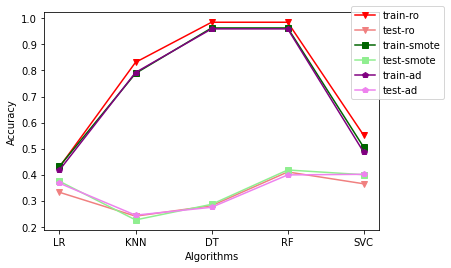

In [51]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
fig = plt.figure(facecolor=(1, 1, 1))
plt.plot(x_axes, model_evaluation_df.iloc[:, 1], label='train-ro', marker='v', color='red')
plt.plot(x_axes, model_evaluation_df.iloc[:, 2], label='test-ro', marker='v', color='lightcoral')
plt.plot(x_axes, model_evaluation_df.iloc[:, 3], label='train-smote', marker='s', color='darkgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 4], label='test-smote', marker='s', color='lightgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 5], label='train-ad', marker='p', color='purple')
plt.plot(x_axes, model_evaluation_df.iloc[:, 6], label='test-ad', marker='p', color='violet')

plt.legend(bbox_to_anchor=(0.9, 1.05))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
fig.savefig('Train_Test_Score_Strat1.png', dpi=300)
plt.show()

The line plot shows that train and test scores of the random sampling technique performs well for Random Forest. 

# **Classification reports for each class**

Based on the classification reports obtained for each model, a line plot is used to represent precision, recall, and F1 scores for each class.

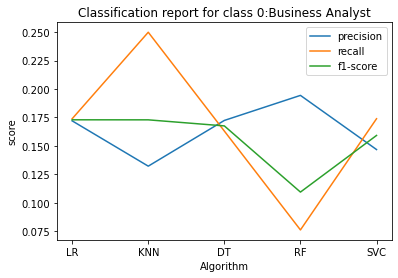

In [23]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 0], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 0], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 0], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 0:Business Analyst')
plt.show()

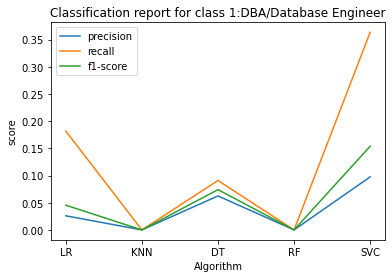

In [24]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 1], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 1], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 1], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 1:DBA/Database Engineer' )
plt.show()

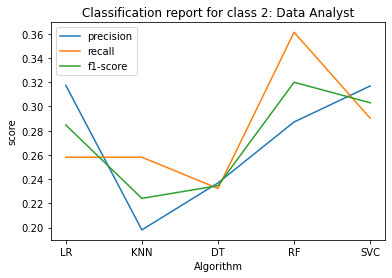

In [25]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 2], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 2], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 2], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 2: Data Analyst' )
plt.show()

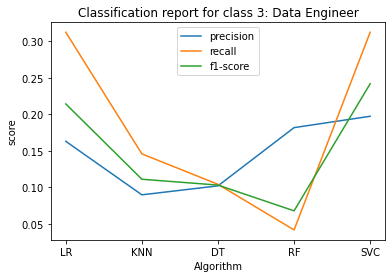

In [26]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 3], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 3], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 3], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 3: Data Engineer' )
plt.show()

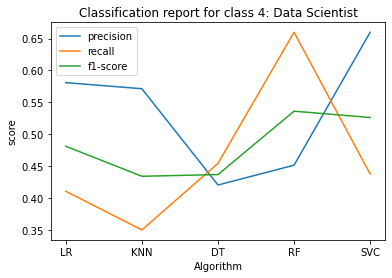

In [27]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 4], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 4], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 4], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 4: Data Scientist' )
plt.show()

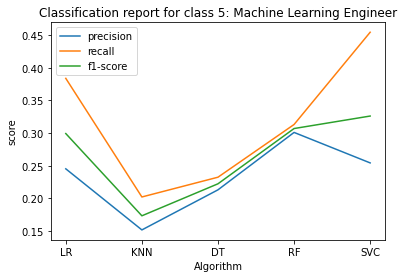

In [28]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 5], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 5], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 5], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 5: Machine Learning Engineer')
plt.show()

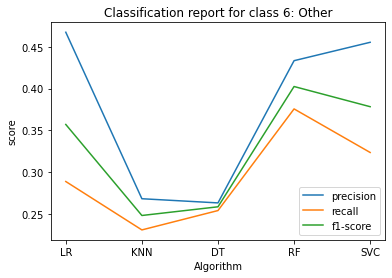

In [29]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 6], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 6], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 6], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 6: Other')
plt.show()

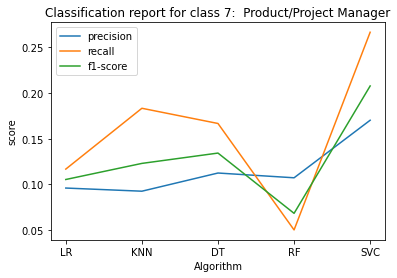

In [30]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 7], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 7], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 7], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 7:  Product/Project Manager')
plt.show()

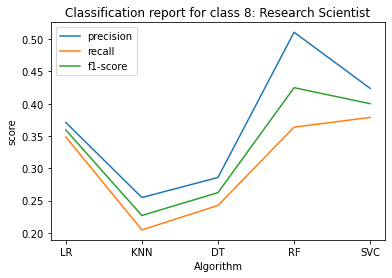

In [31]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 8], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 8], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 8], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 8: Research Scientist')
plt.show()

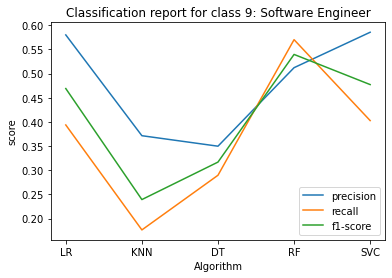

In [32]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 9], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 9], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 9], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 9: Software Engineer' )
plt.show()

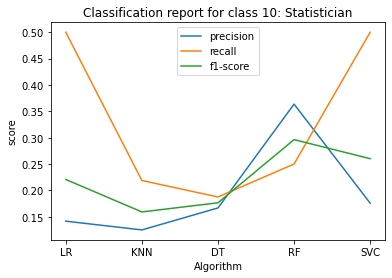

In [33]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 10], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 10], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 10], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 10: Statistician' )
plt.show()

For classes 1 &7, precision, recall and F1 scores are very low for Random Forest.

# **Stratified K fold cross validation**


Stratified K fold cross validation method is used to reduce the risk of overfitting.

In [34]:
#Without resampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.416374 (0.014736)
KNN: 0.309498 (0.009637)
DT: 0.300575 (0.010856)
RF: 0.429677 (0.009248)
SVM: 0.429512 (0.012635)


In [35]:
#Random Oversampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_ro, y_ro, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.409980 (0.011863)
KNN: 0.696610 (0.009272)
DT: 0.882276 (0.004435)
RF: 0.916232 (0.006136)
SVM: 0.509458 (0.007600)


HYPERPARAMETER TUNING

In [36]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [37]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.4368373874872522
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 250}
Best estimator: RandomForestClassifier(min_samples_leaf=3, n_estimators=250)


Predicting the performance of Random Forest with best parameters on test data


In [39]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 3, n_estimators = 500, random_state=0)
rf.fit(X_train,y_train)
print('Train score:', rf.score(X_train, y_train))
print('Test score:', accuracy_score(y_test,y_pred))
y_pred = rf.predict(X_test)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print('_'*80)
print('classification report:', classification_report(y_test,y_pred))

Train score: 0.7919824827353883
Test score: 0.42803030303030304
Confusion matrix: [[  1   0  26   0  32   0  20   0   1  12   0]
 [  0   0   1   0   3   0   3   0   0   4   0]
 [  1   0  54   0  64   0  20   0   1  15   0]
 [  0   0   4   0  27   2   0   0   1  14   0]
 [  0   0  19   0 236  11  10   0   4  17   0]
 [  0   0   4   0  50  17   2   0   7  19   0]
 [  0   0  16   0  37   3  83   2  10  22   0]
 [  0   0   8   0  22   0  12   0   0  18   0]
 [  0   0   8   0  50   5  19   0  32  18   0]
 [  0   0  13   0  52   4  10   0   3 138   1]
 [  0   0   9   0   8   0   6   0   4   1   4]]
________________________________________________________________________________
classification report:               precision    recall  f1-score   support

           0       0.50      0.01      0.02        92
           1       0.00      0.00      0.00        11
           2       0.33      0.35      0.34       155
           3       0.00      0.00      0.00        48
           4       0.41  

The test score is 42%.This model doesn't perform well due to overfitting.


# **PCA**

PCA is used to address the overfitting problem.

In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [177]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

In [178]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, 
                                                    random_state=2)

In [185]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
train_score_pca = []
test_score_pca= []
class_report_pca = pd.DataFrame()

for name, model in models:
    model.fit(X_train_pca, y_train)
    train_accuracy= accuracy_score(y_train, model.predict(X_train_pca))
    train_score_pca.append((name,train_accuracy))
    y_pred = model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_pca.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_pca = class_report_pca.append(class_report.iloc[:3,:11])  
results_pca_train = pd.DataFrame(train_score_pca, columns = ['Model', 'Pca_train'])
results_pca_test = pd.DataFrame(test_score_pca, columns = ['Model', 'Pca_test'])
results_pca = pd.merge(results_pca_train, results_pca_test, on='Model')
print(results_pca)
print(class_report_pca)


  Model  Pca_train  Pca_test
0    LR   0.450059  0.410606
1   KNN   0.512970  0.311364
2    DT   0.983662  0.275000
3    RF   0.983662  0.381818
4   SVM   0.620768  0.420455
                  0         1         2         3         4         5  \
precision  0.177778  0.250000  0.368056  0.058824  0.458647  0.300000   
recall     0.111111  0.066667  0.358108  0.025641  0.715543  0.174757   
f1-score   0.136752  0.105263  0.363014  0.035714  0.558992  0.220859   
precision  0.105590  0.100000  0.195349  0.125000  0.471783  0.211268   
recall     0.236111  0.066667  0.283784  0.051282  0.612903  0.145631   
f1-score   0.145923  0.080000  0.231405  0.072727  0.533163  0.172414   
precision  0.105769  0.076923  0.201493  0.071429  0.517647  0.140000   
recall     0.152778  0.066667  0.182432  0.102564  0.516129  0.135922   
f1-score   0.125000  0.071429  0.191489  0.084211  0.516887  0.137931   
precision  0.111111  0.000000  0.340426  0.000000  0.409158  0.250000   
recall     0.027778  0.

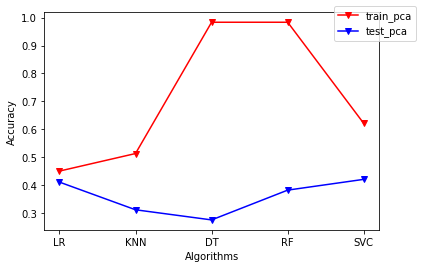

In [186]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
fig = plt.figure(facecolor=(1, 1, 1))
plt.plot(x_axes, results_pca.iloc[:, 1], label='train_pca', marker='v', color='red')
plt.plot(x_axes, results_pca.iloc[:, 2], label='test_pca', marker='v', color='blue')
plt.legend(bbox_to_anchor=(0.85, 1.05))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
fig.savefig('Train_Test_Score_Strat1_pca.png', dpi=300)
plt.show()

In [187]:
rf=RandomForestClassifier()
rf.fit(X_train_pca, y_train)
train_accuracy= accuracy_score(y_train, rf.predict(X_train_pca))
y_pred = rf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test,y_pred)
print('Train Score pca :', train_accuracy)
print('Test Score pca :', test_accuracy)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Train Score pca : 0.9836617820448038
Test Score pca : 0.38636363636363635
Confusion matrix: [[  3   0  14   0  35   1  10   0   1   8   0]
 [  0   0   1   0   5   0   0   0   0   9   0]
 [  2   0  39   0  68   2  14   0   4  19   0]
 [  0   0   8   0  21   0   2   0   2   6   0]
 [  1   0  18   0 279   2  11   0   6  22   2]
 [  0   0   3   0  63   6   5   0   6  20   0]
 [  6   0  13   0  63   0  51   4   7  28   1]
 [  0   0   3   0  25   1  22   1   2  16   2]
 [  0   0   9   0  62   6  10   1  18  20   2]
 [  0   0   9   0  57   6  13   0   7 113   0]
 [  1   0   6   0   8   0   6   0   0   3   0]]


In [188]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.23      0.04      0.07        72
           1       0.00      0.00      0.00        15
           2       0.32      0.26      0.29       148
           3       0.00      0.00      0.00        39
           4       0.41      0.82      0.54       341
           5       0.25      0.06      0.09       103
           6       0.35      0.29      0.32       173
           7       0.17      0.01      0.03        72
           8       0.34      0.14      0.20       128
           9       0.43      0.55      0.48       205
          10       0.00      0.00      0.00        24

    accuracy                           0.39      1320
   macro avg       0.23      0.20      0.18      1320
weighted avg       0.33      0.39      0.32      1320



In [171]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [172]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.42113187347382663
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 500}
Best estimator: RandomForestClassifier(min_samples_leaf=3, n_estimators=500)


In [194]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 3, n_estimators = 500, random_state=0)
rf.fit(X_train_pca, y_train)
train_accuracy= accuracy_score(y_train, rf.predict(X_train_pca))
y_pred = rf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test,y_pred)
print('Train Score pca :', train_accuracy)
print('Test Score pca :', test_accuracy)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Train Score pca : 0.9799562068384706
Test Score pca : 0.3977272727272727
Confusion matrix: [[  3   0  13   0  39   0   8   0   0   9   0]
 [  1   0   0   0   5   0   0   0   0   9   0]
 [  1   0  35   0  71   0  15   0   4  22   0]
 [  0   0   5   0  24   0   1   0   1   8   0]
 [  0   0  16   0 291   3  11   0   4  15   1]
 [  0   0   3   0  68   8   6   0   2  16   0]
 [  6   0  12   0  61   0  52   2   6  34   0]
 [  1   0   2   0  27   0  18   1   3  19   1]
 [  0   0   8   0  59   8  14   1  14  23   1]
 [  0   0   6   0  60   4  13   0   1 121   0]
 [  2   0   4   0   9   0   7   0   1   1   0]]


In [195]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.21      0.04      0.07        72
           1       0.00      0.00      0.00        15
           2       0.34      0.24      0.28       148
           3       0.00      0.00      0.00        39
           4       0.41      0.85      0.55       341
           5       0.35      0.08      0.13       103
           6       0.36      0.30      0.33       173
           7       0.25      0.01      0.03        72
           8       0.39      0.11      0.17       128
           9       0.44      0.59      0.50       205
          10       0.00      0.00      0.00        24

    accuracy                           0.40      1320
   macro avg       0.25      0.20      0.19      1320
weighted avg       0.35      0.40      0.33      1320



Random Forest performs well on train data, but still overfitting exists.

In [55]:
print('The eigenvalues are :', pca.explained_variance_)

The eigenvalues are : [19.11637663  7.35708935  5.66402807  4.17254095  3.59929317  3.43967616
  3.199131    3.11246392  2.87500805  2.734483    2.34298274  2.16984203
  2.11583156  2.00422184  1.97911847  1.80120465  1.73247083  1.67002723
  1.62027994  1.58803911  1.53107334  1.48135987  1.46773287  1.42721368
  1.40128595  1.36825415  1.34122507  1.29492708  1.26840056  1.26477223
  1.24785977  1.23925967  1.23620218  1.2109625   1.19633257  1.18008822
  1.17626366  1.16310442  1.15851554  1.13611049  1.1301348   1.12451761
  1.10827489  1.10486244  1.09284465  1.08479007  1.07338452  1.06256947
  1.06031202  1.05733611  1.04715111  1.04006384  1.03328077  1.02680308
  1.02504166  1.00805144  1.00074258  0.99368034  0.99209622  0.98857161
  0.97764459  0.97280412  0.96983518  0.96543136  0.96055823  0.95077798
  0.94448462  0.938906    0.93762636  0.92858176  0.92838322  0.92172906
  0.91896301  0.91425052  0.90792973  0.89728145  0.89291167  0.88841372
  0.88502645  0.88023154  0.8

In [56]:
print('The ratios are :', pca.explained_variance_ratio_)

The ratios are : [0.08808722 0.03390107 0.02609953 0.01922684 0.01658535 0.01584984
 0.01474142 0.01434206 0.01324788 0.01260035 0.01079634 0.00999851
 0.00974964 0.00923535 0.00911967 0.00829985 0.00798313 0.00769539
 0.00746616 0.0073176  0.0070551  0.00682603 0.00676323 0.00657652
 0.00645705 0.00630484 0.00618029 0.00596695 0.00584472 0.005828
 0.00575007 0.00571044 0.00569635 0.00558005 0.00551264 0.00543778
 0.00542016 0.00535952 0.00533838 0.00523514 0.0052076  0.00518172
 0.00510687 0.00509115 0.00503577 0.00499865 0.0049461  0.00489626
 0.00488586 0.00487215 0.00482522 0.00479256 0.0047613  0.00473145
 0.00472334 0.00464505 0.00461137 0.00457882 0.00457153 0.00455528
 0.00450493 0.00448263 0.00446895 0.00444866 0.0044262  0.00438113
 0.00435213 0.00432643 0.00432053 0.00427885 0.00427794 0.00424728
 0.00423453 0.00421282 0.00418369 0.00413462 0.00411449 0.00409376
 0.00407815 0.00405606 0.00403491 0.00401777 0.00398594 0.0039562
 0.00392899 0.00390371 0.00387864 0.00383988 0.0

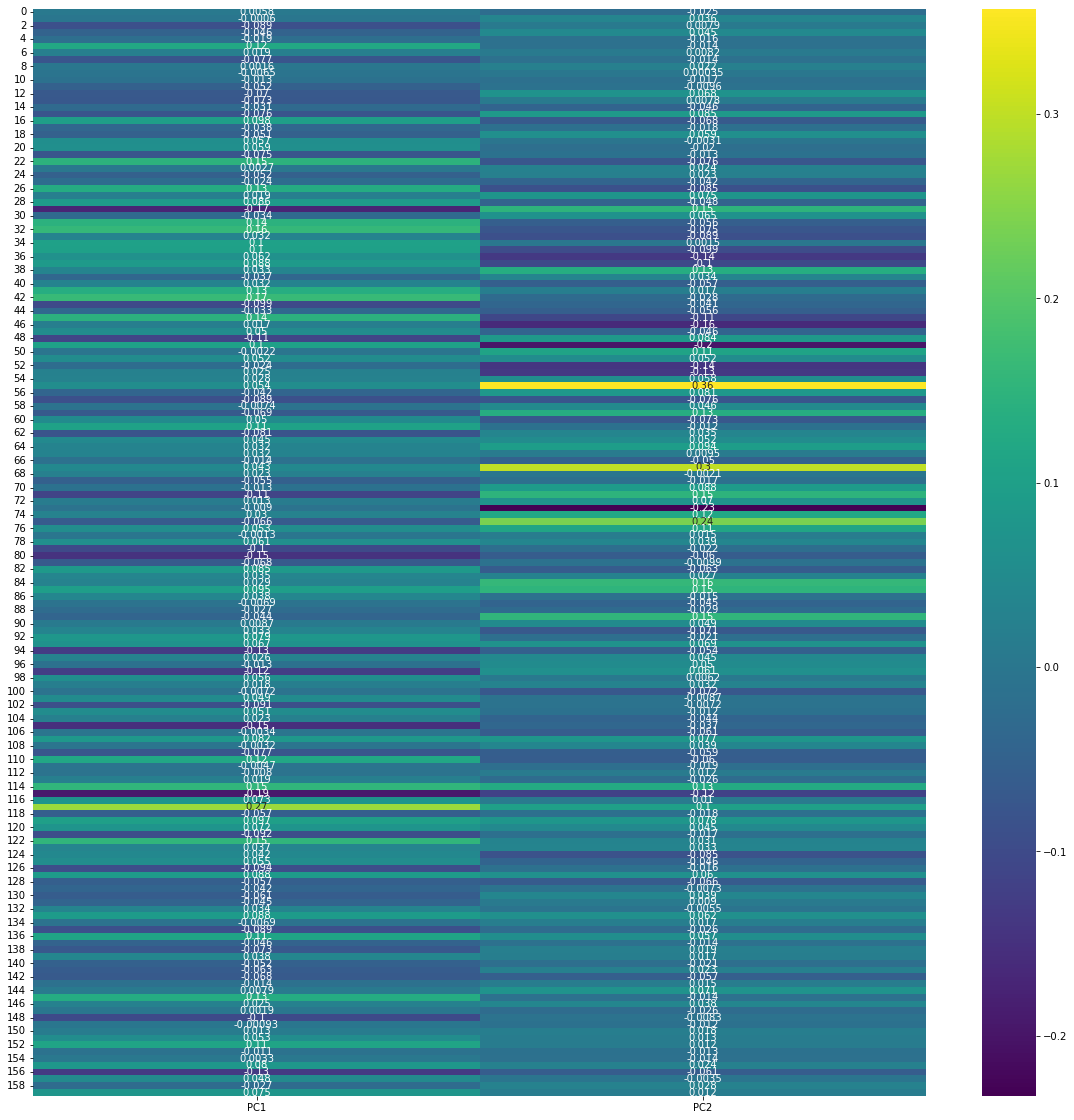

In [57]:

plt.figure(figsize=(20, 20))  # Taille de la figure


Comp_PCA = pd.DataFrame(
    {'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]})

sns.heatmap(Comp_PCA, annot=True, cmap='viridis')
plt.show()

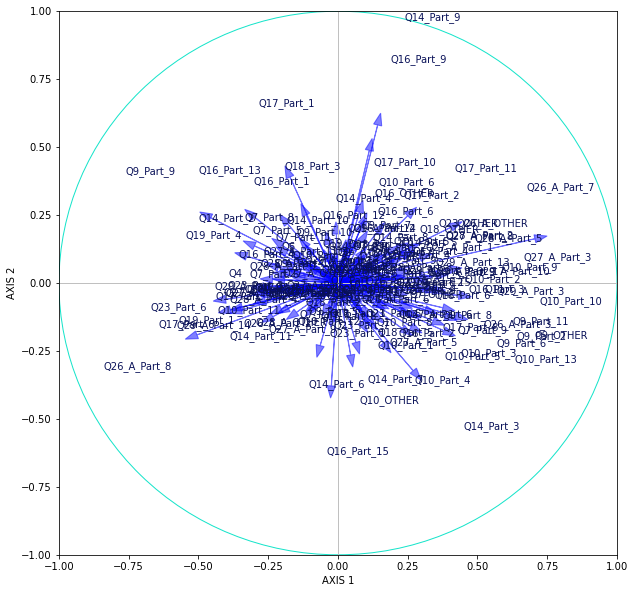

In [58]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((160, 160))
for k in range(160):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Delimitation 
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Displaying variables
for j in range(160):
    plt.annotate(X.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6,
              alpha=0.5, head_width=0.03, color='b')

# Adding Axis
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Circle and labels
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXIS 1')
plt.ylabel('AXIS 2')
plt.show()

As we have too many features in our dataset, it is difficult to interpret the circle plot.

In [51]:
PCA_mat = pd.DataFrame(
    {'PCA 1': X_pca[:, 0], 'PCA 2': X_pca[:, 1], 'target': y})

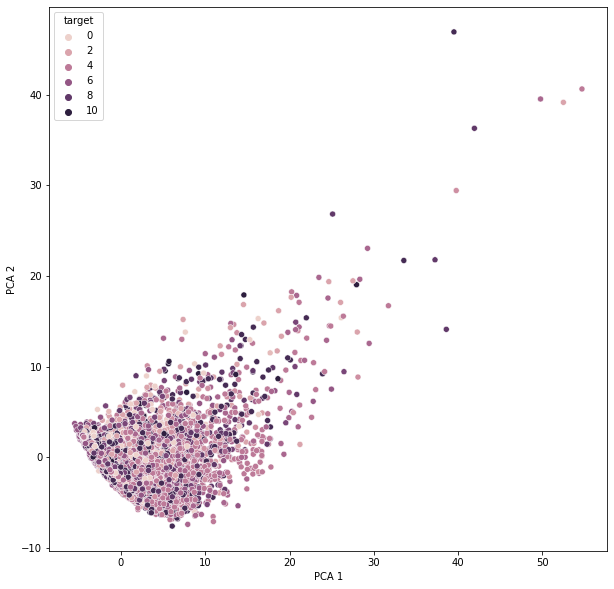

In [52]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PCA 1', y='PCA 2', hue=y, data=PCA_mat)
fig.savefig('Strategy_1_pcagraph.png', dpi=300)
plt.show()

It is not a good representation of our data as our target variables are concentrated in the same area.

# Strategy 1.1

In Strategy 1.1, jobs 1&7 were excluded for the analysis


In [198]:
df1 = df_final[(df_final['target']==0) | (df_final['target']==2) | (df_final['target']==3) | (df_final['target']==4) | (df_final['target']==5)| (df_final['target']==6)| (df_final['target']==8)| (df_final['target']==9)| (df_final['target']==10)]
X = df1.drop('target', axis = 1)
y = df1.target
y.unique()

array([ 3,  9,  4,  2,  8,  6, 10,  5,  0], dtype=int64)

# Train, test split

Here, 90% of the data used as train data whereas 10% used as test data

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Resampling techniques for imbalanced data


In [61]:
##Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
y_ro.value_counts()
print('Classes oversampled :', y_ro.value_counts())

Classes oversampled : 8     3076
2     3076
4     3076
9     3076
6     3076
0     3076
10    3076
3     3076
5     3076
Name: target, dtype: int64


In [62]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ro = []
test_score_ro = []
class_report_ro = pd.DataFrame()

for name, model in models:
    model.fit(X_ro, y_ro)
    train_accuracy= accuracy_score(y_ro, model.predict(X_ro))
    train_score_ro.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ro.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_ro = class_report_ro.append(class_report.iloc[:3,:9])
       
results_ro_train = pd.DataFrame(train_score_ro, columns = ['Model', 'Ro_train'])
results_ro_test = pd.DataFrame(test_score_ro, columns = ['Model', 'Ro_test'])
results_ro = pd.merge(results_ro_train, results_ro_test, on='Model')
print(results_ro)
print(class_report_ro)

  Model  Ro_train   Ro_test
0    LR  0.448490  0.384491
1   KNN  0.805050  0.285945
2    DT  0.985479  0.319063
3    RF  0.985479  0.457997
4   SVM  0.549379  0.411147
                  0         2         3         4         5         6  \
precision  0.147059  0.290909  0.127273  0.711382  0.235294  0.367188   
recall     0.170455  0.242424  0.274510  0.514706  0.349515  0.270115   
f1-score   0.157895  0.264463  0.173913  0.597270  0.281250  0.311258   
precision  0.108974  0.193370  0.098765  0.648649  0.176056  0.286585   
recall     0.193182  0.265152  0.156863  0.423529  0.242718  0.270115   
f1-score   0.139344  0.223642  0.121212  0.512456  0.204082  0.278107   
precision  0.138298  0.171875  0.067797  0.525373  0.216000  0.281879   
recall     0.147727  0.166667  0.078431  0.517647  0.262136  0.241379   
f1-score   0.142857  0.169231  0.072727  0.521481  0.236842  0.260062   
precision  0.255319  0.289773  0.222222  0.564815  0.247312  0.455882   
recall     0.136364  0.386364

In [63]:
##SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [64]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_sm = []
test_score_sm= []
class_report_sm = pd.DataFrame()

for name, model in models:
    model.fit(X_sm, y_sm)
    train_accuracy= accuracy_score(y_sm, model.predict(X_sm))
    train_score_sm.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_sm.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_sm = class_report_sm.append(class_report.iloc[:3,:9])
results_sm_train = pd.DataFrame(train_score_sm, columns = ['Model', 'Smote_train'])
results_sm_test = pd.DataFrame(test_score_sm, columns = ['Model', 'Smote_test'])
results_sm = pd.merge(results_sm_train, results_sm_test, on='Model')
print(results_sm)
print(class_report_sm)

  Model  Smote_train  Smote_test
0    LR     0.467454    0.380452
1   KNN     0.780162    0.281099
2    DT     0.968032    0.301292
3    RF     0.968032    0.454766
4   SVM     0.525827    0.425687
                  0         2         3         4         5         6  \
precision  0.122951  0.268657  0.196429  0.550000  0.233333  0.395833   
recall     0.170455  0.272727  0.215686  0.452941  0.271845  0.327586   
f1-score   0.142857  0.270677  0.205607  0.496774  0.251121  0.358491   
precision  0.121387  0.246667  0.108844  0.713542  0.163265  0.287879   
recall     0.238636  0.280303  0.313725  0.402941  0.233010  0.218391   
f1-score   0.160920  0.262411  0.161616  0.515038  0.192000  0.248366   
precision  0.121495  0.193548  0.049383  0.577061  0.141509  0.284884   
recall     0.147727  0.227273  0.078431  0.473529  0.145631  0.281609   
f1-score   0.133333  0.209059  0.060606  0.520194  0.143541  0.283237   
precision  0.293103  0.311765  0.173913  0.592965  0.254098  0.478632   

In [65]:
##ADASYN
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)
print('Classes ADASYN :', y_ad.value_counts())

Classes ADASYN : 5     3312
9     3255
2     3095
4     3076
0     3048
6     3015
10    3008
3     2961
8     2815
Name: target, dtype: int64


In [66]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ad = []
test_score_ad= []
class_report_ad = pd.DataFrame()

for name, model in models:
    model.fit(X_ad, y_ad)
    train_accuracy= accuracy_score(y_ad, model.predict(X_ad))
    train_score_ad.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ad.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_ad = class_report_ad.append(class_report.iloc[:,:9])  
results_ad_train = pd.DataFrame(train_score_ad, columns = ['Model', 'Adasyn_train'])
results_ad_test = pd.DataFrame(test_score_ad, columns = ['Model', 'Adasyn_test'])
results_ad = pd.merge(results_ad_train, results_ad_test, on='Model')
print(results_ad)
print(class_report_ad)

  Model  Adasyn_train  Adasyn_test
0    LR      0.452782     0.409532
1   KNN      0.776400     0.240711
2    DT      0.962625     0.315024
3    RF      0.962625     0.430533
4   SVM      0.505456     0.424879
                   0           2          3           4           5  \
precision   0.170213    0.274074   0.203704    0.600000    0.241379   
recall      0.181818    0.280303   0.215686    0.547059    0.271845   
f1-score    0.175824    0.277154   0.209524    0.572308    0.255708   
support    88.000000  132.000000  51.000000  340.000000  103.000000   
precision   0.116751    0.163636   0.084507    0.679245    0.157895   
recall      0.261364    0.204545   0.235294    0.317647    0.233010   
f1-score    0.161404    0.181818   0.124352    0.432866    0.188235   
support    88.000000  132.000000  51.000000  340.000000  103.000000   
precision   0.159292    0.207143   0.089552    0.542056    0.187500   
recall      0.204545    0.219697   0.117647    0.511765    0.233010   
f1-score 

# **Performances on Train and Test Set**

In [67]:
model_evaluation_df = pd.concat([results_ro, results_sm, results_ad], axis = 1)
model_evaluation_df = model_evaluation_df.loc[:,~model_evaluation_df.columns.duplicated()]
model_evaluation_df.set_index('Model')

,Ro_train,Ro_test,Smote_train,Smote_test,Adasyn_train,Adasyn_test
Model,,,,,,
LR,0.448490,0.384491,0.467454,0.380452,0.452782,0.409532
KNN,0.805050,0.285945,0.780162,0.281099,0.776400,0.240711
DT,0.985479,0.319063,0.968032,0.301292,0.962625,0.315024
RF,0.985479,0.457997,0.968032,0.454766,0.962625,0.430533
SVM,0.549379,0.411147,0.525827,0.425687,0.505456,0.424879


Again Random Forest performs well when the Random oversampling technique is used. Test data score slightly improved to 45% but still overfitting exists.

# **Classification Reports**

**Precision Scores**

In [68]:
classifications = [class_report_ro, class_report_sm, class_report_ad]
technique = ['Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.',
            'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
            'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN']
reports_prec = pd.DataFrame()
for report in classifications:
    precision = report.loc['precision'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_prec = reports_prec.append(precision)
reports_prec['technique'] = technique
reports_prec

,0,2,3,4,5,6,8,9,10,technique
LR,0.147059,0.290909,0.127273,0.711382,0.235294,0.367188,0.393701,0.527607,0.212121,Random oversamp.
KNN,0.108974,0.193370,0.098765,0.648649,0.176056,0.286585,0.240876,0.428571,0.126761,Random oversamp.
DT,0.138298,0.171875,0.067797,0.525373,0.216000,0.281879,0.263636,0.385000,0.131579,Random oversamp.
RF,0.255319,0.289773,0.222222,0.564815,0.247312,0.455882,0.476190,0.508929,0.562500,Random oversamp.
SVM,0.233333,0.284615,0.145833,0.783410,0.229885,0.386861,0.455357,0.574850,0.235294,Random oversamp.
LR,0.122951,0.268657,0.196429,0.550000,0.233333,0.395833,0.368000,0.518868,0.311111,SMOTE
KNN,0.121387,0.246667,0.108844,0.713542,0.163265,0.287879,0.218045,0.472222,0.130435,SMOTE
DT,0.121495,0.193548,0.049383,0.577061,0.141509,0.284884,0.244094,0.375000,0.162791,SMOTE
RF,0.293103,0.311765,0.173913,0.592965,0.254098,0.478632,0.433962,0.509259,0.357143,SMOTE
SVM,0.241758,0.307692,0.138889,0.611111,0.214876,0.384615,0.424242,0.507177,0.317073,SMOTE


# **Recall**

In [69]:
reports_recall = pd.DataFrame()
for report in classifications:
    recall = report.loc['recall'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_recall = reports_recall.append(recall)
reports_recall['technique'] = technique
reports_recall

,0,2,3,4,5,6,8,9,10,technique
LR,0.170455,0.242424,0.274510,0.514706,0.349515,0.270115,0.431034,0.438776,0.552632,Random oversamp.
KNN,0.193182,0.265152,0.156863,0.423529,0.242718,0.270115,0.284483,0.183673,0.236842,Random oversamp.
DT,0.147727,0.166667,0.078431,0.517647,0.262136,0.241379,0.250000,0.392857,0.131579,Random oversamp.
RF,0.136364,0.386364,0.039216,0.717647,0.223301,0.356322,0.431034,0.581633,0.236842,Random oversamp.
SVM,0.318182,0.280303,0.274510,0.500000,0.388350,0.304598,0.439655,0.489796,0.526316,Random oversamp.
LR,0.170455,0.272727,0.215686,0.452941,0.271845,0.327586,0.396552,0.561224,0.368421,SMOTE
KNN,0.238636,0.280303,0.313725,0.402941,0.233010,0.218391,0.250000,0.173469,0.315789,SMOTE
DT,0.147727,0.227273,0.078431,0.473529,0.145631,0.281609,0.267241,0.321429,0.184211,SMOTE
RF,0.193182,0.401515,0.078431,0.694118,0.300971,0.321839,0.396552,0.561224,0.263158,SMOTE
SVM,0.250000,0.333333,0.098039,0.614706,0.252427,0.344828,0.362069,0.540816,0.342105,SMOTE


# **f1-scores**

In [70]:
reports_f1 = pd.DataFrame()
for report in classifications:
    f1 = report.loc['f1-score'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_f1 = reports_f1.append(f1)
reports_f1['technique'] = technique
reports_f1

,0,2,3,4,5,6,8,9,10,technique
LR,0.157895,0.264463,0.173913,0.597270,0.281250,0.311258,0.411523,0.479109,0.306569,Random oversamp.
KNN,0.139344,0.223642,0.121212,0.512456,0.204082,0.278107,0.260870,0.257143,0.165138,Random oversamp.
DT,0.142857,0.169231,0.072727,0.521481,0.236842,0.260062,0.256637,0.388889,0.131579,Random oversamp.
RF,0.177778,0.331169,0.066667,0.632124,0.234694,0.400000,0.452489,0.542857,0.333333,Random oversamp.
SVM,0.269231,0.282443,0.190476,0.610413,0.288809,0.340836,0.447368,0.528926,0.325203,Random oversamp.
LR,0.142857,0.270677,0.205607,0.496774,0.251121,0.358491,0.381743,0.539216,0.337349,SMOTE
KNN,0.160920,0.262411,0.161616,0.515038,0.192000,0.248366,0.232932,0.253731,0.184615,SMOTE
DT,0.133333,0.209059,0.060606,0.520194,0.143541,0.283237,0.255144,0.346154,0.172840,SMOTE
RF,0.232877,0.350993,0.108108,0.639566,0.275556,0.384880,0.414414,0.533981,0.303030,SMOTE
SVM,0.245810,0.320000,0.114943,0.612903,0.232143,0.363636,0.390698,0.523457,0.329114,SMOTE


# **Graphs**

**Train and Test Scores**

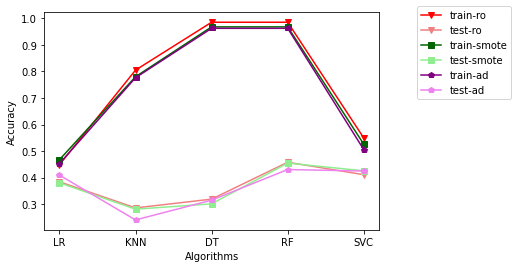

In [71]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, model_evaluation_df.iloc[:, 1], label='train-ro', marker='v', color='red')
plt.plot(x_axes, model_evaluation_df.iloc[:, 2], label='test-ro', marker='v', color='lightcoral')
plt.plot(x_axes, model_evaluation_df.iloc[:, 3], label='train-smote', marker='s', color='darkgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 4], label='test-smote', marker='s', color='lightgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 5], label='train-ad', marker='p', color='purple')
plt.plot(x_axes, model_evaluation_df.iloc[:, 6], label='test-ad', marker='p', color='violet')

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()



# **Graphs**

**Classification reports for each class**


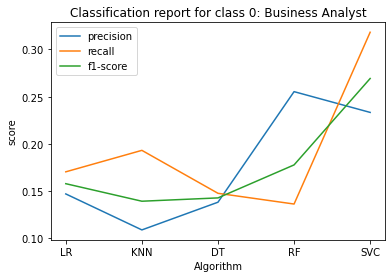

In [72]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 0], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 0], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 0], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 0: Business Analyst')
plt.show()

 **Classification reports for each class**

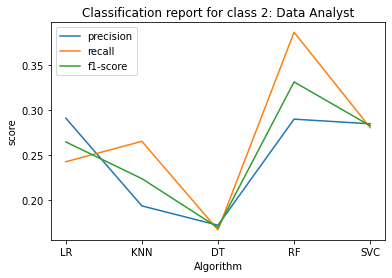

In [73]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 1], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 1], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 1], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 2: Data Analyst' )
plt.show()

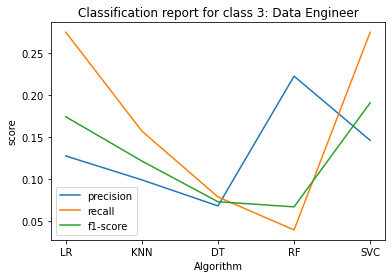

In [74]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 2], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 2], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 2], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 3: Data Engineer')
plt.show()

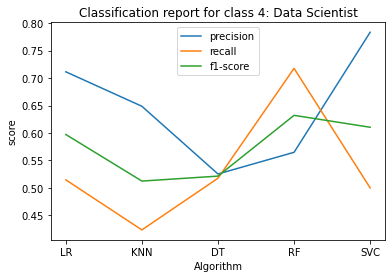

In [75]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 3], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 3], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 3], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 4: Data Scientist' )
plt.show()

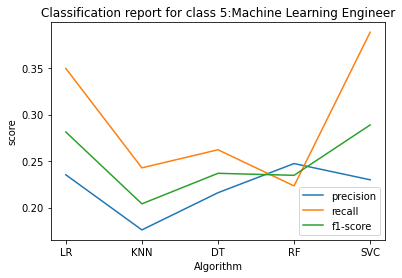

In [76]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 4], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 4], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 4], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 5:Machine Learning Engineer')
plt.show()

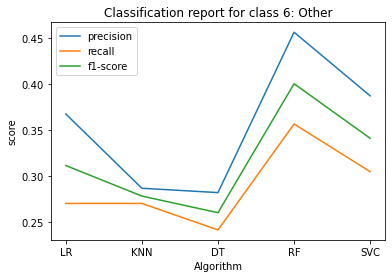

In [77]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 5], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 5], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 5], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 6: Other')
plt.show()

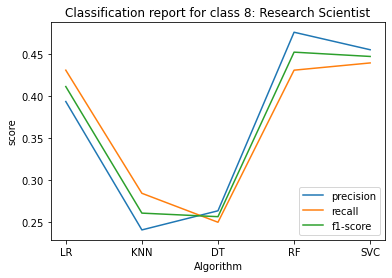

In [78]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 6], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 6], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 6], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 8: Research Scientist')
plt.show()

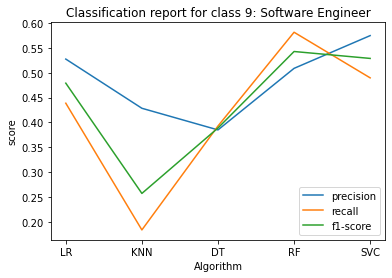

In [79]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 7], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 7], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 7], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 9: Software Engineer' )
plt.show()

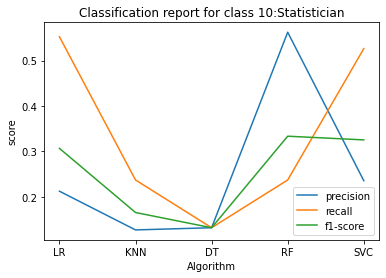

In [80]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 8], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 8], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 8], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 10:Statistician' )
plt.show()

SVM with class_weight balanced is used to treat imbalanced datasets.

In [81]:
##SVM with class_weight balanced
svm_balanced = SVC(class_weight='balanced')
svm_balanced = svm_balanced.fit(X_train, y_train)
train_score = (accuracy_score(y_train, svm_balanced.predict(X_train))*100)
y_pred = svm_balanced.predict(X_test)
test_score = (accuracy_score(y_test,y_pred)*100)
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 42.711618633315204
Test score: 39.66074313408724


The results obtained from SVM with class weighted balanced model is not good.

# **Stratified K fold cross validation**


In [82]:
#Without resampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.444296 (0.013264)
KNN: 0.339530 (0.010634)
DT: 0.338272 (0.011645)
RF: 0.460456 (0.012058)
SVM: 0.456863 (0.015306)


In [83]:
#Random Oversampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_ro, y_ro, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.435161 (0.007386)
KNN: 0.658034 (0.007583)
DT: 0.857029 (0.005193)
RF: 0.896728 (0.004225)
SVM: 0.511415 (0.009110)


# **HYPERPARAMETER TUNING**

In [84]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [85]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.4688042701011497
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 500}
Best estimator: RandomForestClassifier(min_samples_leaf=3, n_estimators=500)


Predicting the performance of Random Forest with best parameters on test data


In [86]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 1, n_estimators = 1000, random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Train score:', rf.score(X_train, y_train))
print('Test score:', accuracy_score(y_test,y_pred))
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print('_'*20)
print('classification report:', classification_report(y_test,y_pred))

Train score: 0.9855462788401114
Test score: 0.4555735056542811
Confusion matrix: [[  5  24   0  31   4  13   1  10   0]
 [  5  50   0  42   3  17   0  13   2]
 [  3   7   0  24   2   2   1  12   0]
 [  0  24   0 279   9   9   5  14   0]
 [  0   8   0  40  13   7  12  23   0]
 [  4  20   0  43   2  60  15  30   0]
 [  0   5   0  35   1  17  42  16   0]
 [  1  11   0  50   7  10   4 113   0]
 [  0   6   0  12   0  10   5   3   2]]
____________________
classification report:               precision    recall  f1-score   support

           0       0.28      0.06      0.09        88
           2       0.32      0.38      0.35       132
           3       0.00      0.00      0.00        51
           4       0.50      0.82      0.62       340
           5       0.32      0.13      0.18       103
           6       0.41      0.34      0.38       174
           8       0.49      0.36      0.42       116
           9       0.48      0.58      0.53       196
          10       0.50      0.05   

The test score is 45%.This model doesn't perform well due to overfitting

# **PCA**

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [201]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

In [202]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, 
                                                    random_state=2)

In [206]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
train_score_pca = []
test_score_pca= []
class_report_pca = pd.DataFrame()

for name, model in models:
    model.fit(X_train_pca, y_train)
    train_accuracy= accuracy_score(y_train, model.predict(X_train_pca))
    train_score_pca.append((name,train_accuracy))
    y_pred = model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_pca.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_pca = class_report_pca.append(class_report.iloc[:2,:9])
results_pca_train = pd.DataFrame(train_score_pca, columns = ['Model', 'Pca_train'])
results_pca_test = pd.DataFrame(test_score_pca, columns = ['Model', 'Pca_test'])
results_pca = pd.merge(results_pca_train, results_pca_test, on='Model')
results_pca

,Model,Pca_train,Pca_test
0,LR,0.475357,0.442649
1,KNN,0.536224,0.363489
2,DT,0.985277,0.283522
3,RF,0.985277,0.407916
4,SVM,0.644851,0.450727


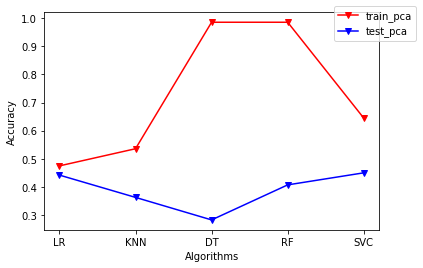

In [207]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
fig = plt.figure(facecolor=(1, 1, 1))
plt.plot(x_axes, results_pca.iloc[:, 1], label='train_pca', marker='v', color='red')
plt.plot(x_axes, results_pca.iloc[:, 2], label='test_pca', marker='v', color='blue')
plt.legend(bbox_to_anchor=(0.85, 1.05))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
fig.savefig('Train_Test_Score_Strat1.1_pca.png', dpi=300)
plt.show()

In [208]:
class_report_pca

,0,2,3,4,5,6,8,9,10
precision,0.214286,0.348148,0.250000,0.485207,0.500000,0.365269,0.500000,0.484444,0.277778
recall,0.065217,0.348148,0.094340,0.713043,0.240310,0.381250,0.351852,0.567708,0.208333
precision,0.149254,0.236364,0.117647,0.531553,0.341176,0.300546,0.258621,0.478632,0.166667
recall,0.217391,0.385185,0.037736,0.634783,0.224806,0.343750,0.138889,0.291667,0.083333
precision,0.137931,0.150000,0.020000,0.494220,0.285714,0.237288,0.113208,0.299492,0.100000
recall,0.130435,0.155556,0.018868,0.495652,0.232558,0.262500,0.111111,0.307292,0.125000
precision,0.272727,0.300000,0.000000,0.426087,0.347826,0.367347,0.272727,0.478469,0.250000
recall,0.032609,0.244444,0.000000,0.852174,0.062016,0.337500,0.111111,0.520833,0.041667
precision,0.000000,0.378378,0.000000,0.460884,0.470588,0.411392,0.409091,0.521127,0.571429
recall,0.000000,0.414815,0.000000,0.785507,0.186047,0.406250,0.250000,0.578125,0.166667


In [209]:
rf=RandomForestClassifier()
rf.fit(X_train_pca, y_train)
train_accuracy= accuracy_score(y_train, rf.predict(X_train_pca))
y_pred = rf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test,y_pred)
print('Train Score pca :', train_accuracy)
print('Test Score pca :', test_accuracy)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Train Score pca : 0.9852769548433432
Test Score pca : 0.3998384491114701
Confusion matrix: [[  3  19   0  34   2  12   2  19   1]
 [  7  29   0  68   1  11   5  13   1]
 [  0   6   0  34   2   2   1   8   0]
 [  2  20   0 278   3  14   5  23   0]
 [  0   4   0  82  10   7   7  19   0]
 [  0  12   0  59   1  53   6  28   1]
 [  0   9   0  50   0  14  15  19   1]
 [  1  10   0  54   3  15   5 104   0]
 [  0   3   0  12   0   5   0   1   3]]


In [210]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [211]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.41951643732581767
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 500}
Best estimator: RandomForestClassifier(min_samples_leaf=5, n_estimators=500)


In [212]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 5, n_estimators = 500, random_state=0)
rf.fit(X_train_pca, y_train)
train_accuracy= accuracy_score(y_train, rf.predict(X_train_pca))
y_pred = rf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test,y_pred)
print('Train Score pca :', train_accuracy)
print('Test Score pca :', test_accuracy)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Train Score pca : 0.9358111141036
Test Score pca : 0.4208400646203554
Confusion matrix: [[  2  15   0  44   0  15   1  15   0]
 [  7  39   0  64   0   9   2  14   0]
 [  1   5   0  39   0   2   1   5   0]
 [  1  14   0 300   1  11   3  15   0]
 [  0   3   0  90   6   4   8  18   0]
 [  0   9   0  62   1  58   3  27   0]
 [  0   8   0  54   1  15  11  19   0]
 [  0   5   0  63   1  17   2 103   1]
 [  0   1   0  14   0   7   0   0   2]]


In [213]:
print('classification report:', classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           0       0.18      0.02      0.04        92
           2       0.39      0.29      0.33       135
           3       0.00      0.00      0.00        53
           4       0.41      0.87      0.56       345
           5       0.60      0.05      0.09       129
           6       0.42      0.36      0.39       160
           8       0.35      0.10      0.16       108
           9       0.48      0.54      0.50       192
          10       0.67      0.08      0.15        24

    accuracy                           0.42      1238
   macro avg       0.39      0.26      0.25      1238
weighted avg       0.41      0.42      0.35      1238



Random Forest performs well on train data, but the test score is 39% which shows that still overfitting exists.

In [ ]:
print('The eigenvalues are :', pca.explained_variance_)



The eigenvalues are : [19.28613621  7.44291497  5.66023302  4.17301179  3.58570372  3.44725975
  3.20612202  3.0897566   2.88839448  2.75927155  2.34506057  2.16190069
  2.12468154  2.00916825  1.98658346  1.80227109  1.72272921  1.67037839
  1.61774025  1.58042401  1.53037106  1.47424842  1.46777962  1.42923778
  1.404121    1.37005724  1.33452594  1.30181321  1.27682332  1.26590486
  1.25026597  1.23995816  1.2369153   1.21249182  1.20012983  1.186061
  1.18065991  1.16491088  1.15170174  1.13491322  1.12812779  1.12501473
  1.10888665  1.10648978  1.09316155  1.08658756  1.08088828  1.06710603
  1.06377682  1.05290142  1.04905779  1.04828481  1.03389828  1.02488299
  1.018874    1.01572126  1.00390152  0.99427427  0.99323457  0.98316753
  0.97861269  0.97070911  0.96511482  0.96062285  0.95783345  0.95400067
  0.94830437  0.94275591  0.93725376  0.93301493  0.93054591  0.92527513
  0.9217837   0.90663254  0.90553672  0.89945922  0.89877333  0.89058384
  0.88452957  0.87848492  0.875

In [ ]:
print('The ratios are :', pca.explained_variance_ratio_)

The ratios are : [0.08886902 0.03429638 0.02608192 0.01922892 0.01652265 0.01588471
 0.01477356 0.01423736 0.0133095  0.01271451 0.01080586 0.00996187
 0.00979037 0.00925809 0.00915402 0.00830473 0.0079382  0.00769697
 0.00745442 0.00728247 0.00705183 0.00679322 0.00676341 0.00658582
 0.00647008 0.00631312 0.00614939 0.00599865 0.0058835  0.00583319
 0.00576113 0.00571363 0.00569961 0.00558707 0.00553011 0.00546528
 0.00544039 0.00536782 0.00530695 0.00522959 0.00519833 0.00518398
 0.00510966 0.00509862 0.0050372  0.00500691 0.00498065 0.00491714
 0.0049018  0.00485169 0.00483398 0.00483042 0.00476412 0.00472258
 0.00469489 0.00468036 0.0046259  0.00458154 0.00457675 0.00453036
 0.00450937 0.00447295 0.00444717 0.00442648 0.00441362 0.00439596
 0.00436971 0.00434415 0.00431879 0.00429926 0.00428788 0.0042636
 0.00424751 0.00417769 0.00417264 0.00414464 0.00414148 0.00410374
 0.00407584 0.00404799 0.00403641 0.00401338 0.00398928 0.00396169
 0.00393328 0.00389763 0.00386853 0.00383999 0

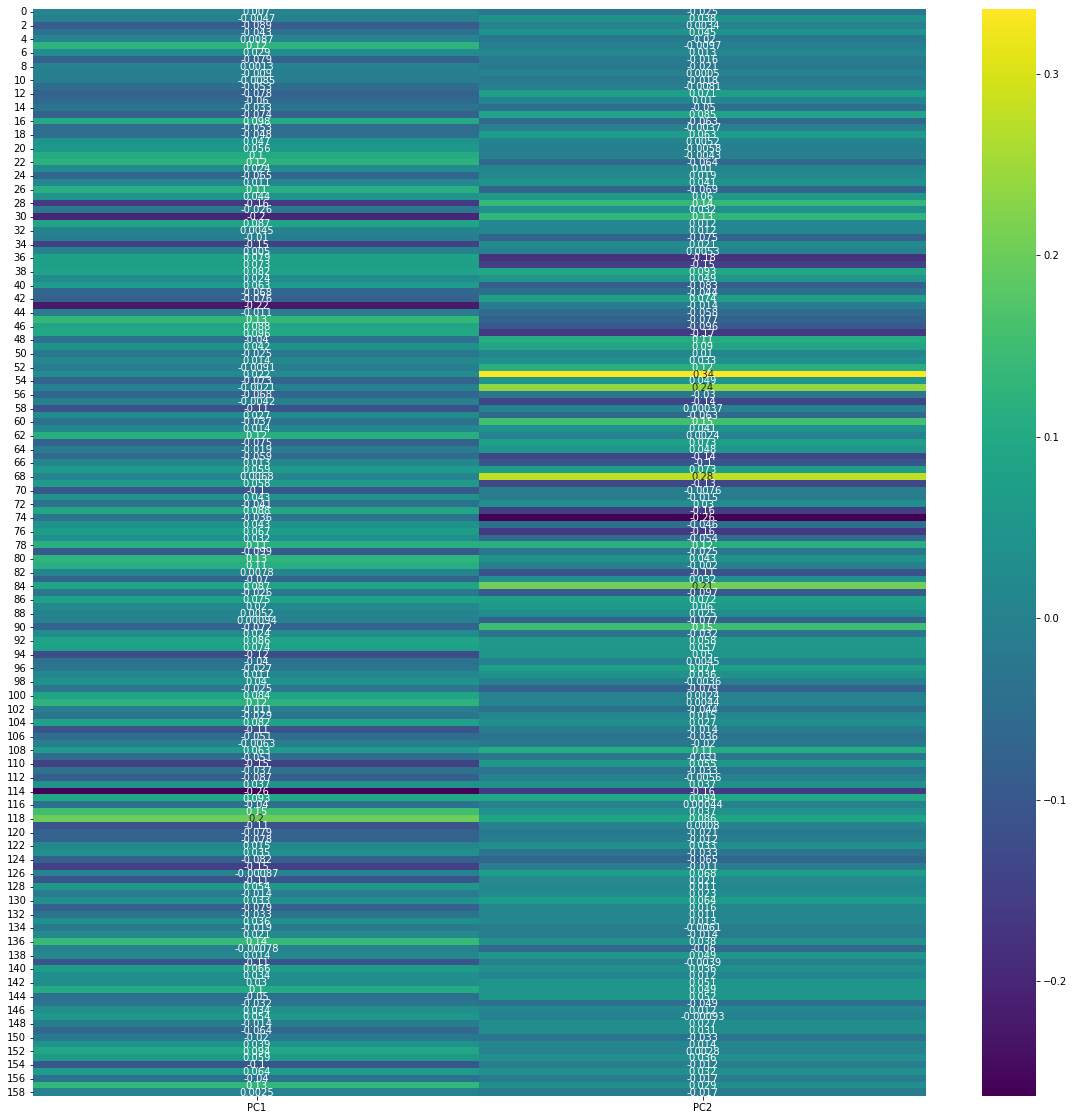

In [ ]:

plt.figure(figsize=(20, 20))  # Taille de la figure


Comp_PCA = pd.DataFrame(
    {'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]})

sns.heatmap(Comp_PCA, annot=True, cmap='viridis')
plt.show()

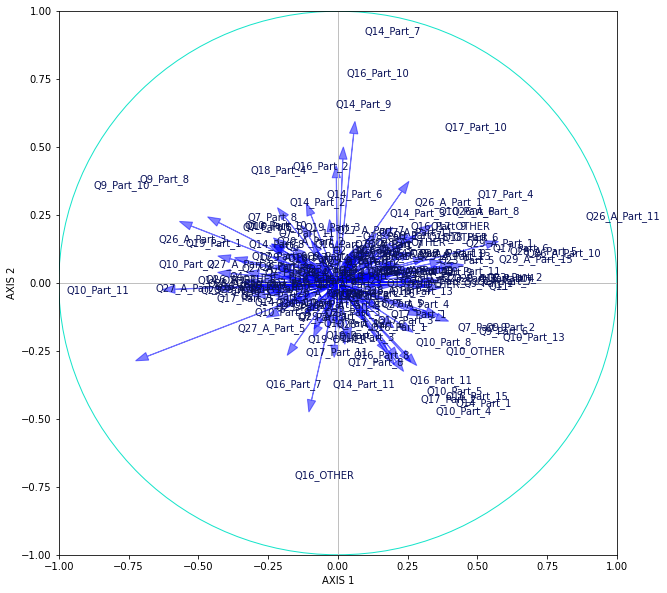

In [ ]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((159, 159))
for k in range(159):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Delimitation 
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Displaying variables
for j in range(159):
    plt.annotate(X.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6,
              alpha=0.5, head_width=0.03, color='b')

# Adding Axis
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Circle and labels
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXIS 1')
plt.ylabel('AXIS 2')
plt.show()

In [ ]:
PCA_mat = pd.DataFrame(
    {'AXIS 1': X_pca[:, 0], 'AXIS 2': X_pca[:, 1], 'target': y})

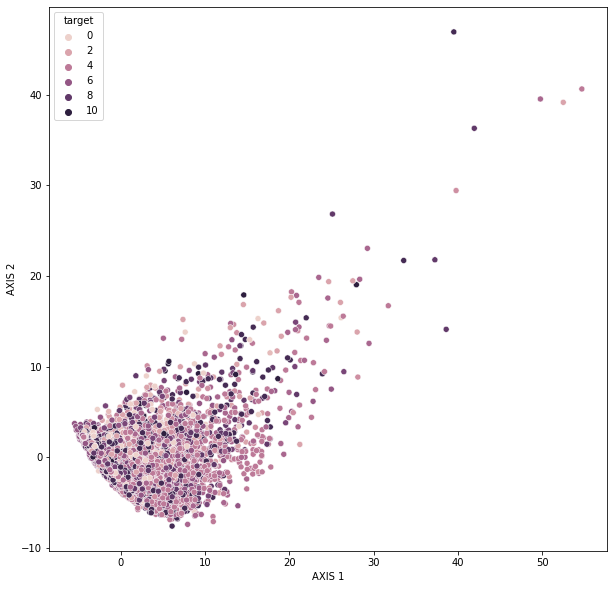

In [ ]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x='AXIS 1', y='AXIS 2', hue=y, data=PCA_mat)

plt.show()

It is not a good representation of our data as our target variables  are concentrated in the same area.


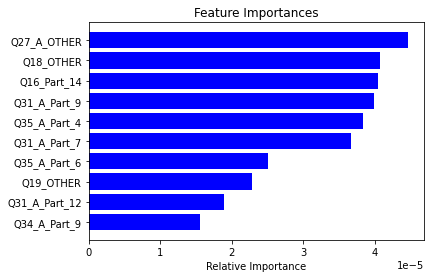

In [ ]:
features = df_final.columns
importances = rf.feature_importances_
#indices = np.argsort(importances)

indices = np.argsort(importances)[:10]

# customized number 
num_features = 10 

#plt.figure(figsize=(10,100))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

# Strategy 2

In [7]:
df_final.head()

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,target
0,3,0,3,4,9,2,0,2,1,1,...,0,0,1,0,0,0,0,0,0,3
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,9
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,2


## Identifying the top 5 represented jobs

In [8]:
df_final['target'].value_counts().head()

4    3416
9    1968
6    1737
2    1475
8    1174
Name: target, dtype: int64

## Creating subset of df containing only the  5 most represented jobs

In [9]:
df_top = df_final[(df_final['target']==4) | (df_final['target']==9) | (df_final['target']==6) | (df_final['target']==2) | (df_final['target']==8)]
df_top

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,target
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,9
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,2
5,4,0,1,4,9,0,2,3,1,0,...,0,0,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,4,0,0,1,9,2,7,4,0,0,...,0,0,0,0,0,0,0,0,1,6
13189,0,0,3,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13190,0,0,6,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13191,3,0,3,5,9,2,7,4,1,0,...,0,0,0,0,0,0,0,0,0,8


## Splitting data into target and explanatory variables

In [10]:
target= df_top['target']
data = df_top.drop('target', axis=1)

## Splitting data into training and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.1)

## Comparing different oversampling techniques

In [16]:
# random oversampler
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)

# SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

# ADASYN
ada = ADASYN()
x_ada, y_ada = ada.fit_resample(X_train, y_train)

## Testing different models

**No oversampling**

In [17]:
scores_test_noOs = []
scores_train_noOs = []
classification = pd.DataFrame()

In [18]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]
for model in model:
    model.fit(X_train, y_train)
    testy_pred = model.predict(X_test)
    scores_test_noOs.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_noOs.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    classification = classification.append(report.iloc[:3, :5])

**Random oversampling**

In [19]:
scores_test_ro = []
scores_train_ro = []
class_ro = pd.DataFrame()

In [20]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]
for model in model:
    model.fit(X_ro, y_ro)
    testy_pred = model.predict(X_test)
    scores_test_ro.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_ro.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    class_ro = class_ro.append(report.iloc[:3, :5])

**SMOTE**

In [21]:
scores_test_SMOTE = []
scores_train_SMOTE = []
class_SMOTE = pd.DataFrame()

In [22]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]

for model in model:
    model.fit(X_sm, y_sm)
    testy_pred = model.predict(X_test)
    scores_test_SMOTE.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_SMOTE.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    class_SMOTE = class_SMOTE.append(report.iloc[:3, :5])

**ADASYN**

In [23]:
scores_test_ada = []
scores_train_ada = []
class_ada = pd.DataFrame()

In [24]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]

for model in model:
    model.fit(x_ada, y_ada)
    testy_pred = model.predict(X_test)
    scores_test_ada.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_ada.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    class_ada = class_ada.append(report.iloc[:3, :5])

## Performances on Test Set

In [25]:
scores_test = pd.DataFrame({'no oversampling': scores_test_noOs,
                      'random oversampling': scores_test_ro,
                      'SMOTE': scores_test_SMOTE,
                      'ADASYN': scores_test_ada}, index=['SVM', 'KNN', 'RF', 'DT', 'LR'])
scores_test

,no oversampling,random oversampling,SMOTE,ADASYN
SVM,0.576254,0.561924,0.555783,0.560901
KNN,0.452405,0.423746,0.421699,0.405322
RF,0.590583,0.590583,0.591607,0.581372
DT,0.453429,0.470829,0.446264,0.443193
LR,0.577277,0.557830,0.552712,0.557830


## Performances on Training Set

In [26]:
scores_train = pd.DataFrame({'no oversampling': scores_train_noOs,
                      'random oversampling': scores_train_ro,
                      'SMOTE': scores_train_SMOTE,
                      'ADASYN': scores_train_ada}, index=['SVM', 'KNN', 'RF', 'DT', 'LR'])
scores_train

,no oversampling,random oversampling,SMOTE,ADASYN
SVM,0.609007,0.612533,0.605709,0.607074
KNN,0.618446,0.652792,0.685432,0.715455
RF,0.989310,0.988741,0.986694,0.986808
DT,0.989310,0.988514,0.986580,0.986467
LR,0.586830,0.563062,0.564995,0.566815


All algorithms perform better on the training than on the test set, so the models are still overfitting.

## Classification reports

**Precision Scores**

In [27]:
classifications = [classification, class_ro, class_SMOTE, class_ada]
technique = ['No oversampling', 'No oversampling', 'No oversampling', 'No oversampling', 'No oversampling',
            'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.',
            'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
            'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN']
reports_prec = pd.DataFrame()
for report in classifications:
    precision = report.loc['precision'].set_axis(['SVC', 'KNN', 'RF', 'DT', 'LR'], axis=0)
    reports_prec = reports_prec.append(precision)
reports_prec['technique'] = technique
reports_prec

,2,4,6,8,9,technique
SVC,0.542730,0.618342,0.545012,0.626750,0.657190,No oversampling
KNN,0.493143,0.670360,0.542978,0.610526,0.758684,No oversampling
RF,0.993827,0.979859,0.987959,0.999038,0.998287,No oversampling
DT,0.984055,0.981725,0.989828,1.000000,1.000000,No oversampling
LR,0.500464,0.607196,0.529907,0.565160,0.640563,No oversampling
SVC,0.456038,0.784508,0.545255,0.507257,0.672596,Random oversamp.
KNN,0.495943,0.823556,0.602088,0.567729,0.785144,Random oversamp.
RF,0.979623,0.986727,0.988550,0.990521,0.998288,Random oversamp.
DT,0.976709,0.986403,0.989172,0.991453,0.998857,Random oversamp.
LR,0.434431,0.715958,0.483550,0.430100,0.630726,Random oversamp.


**Recall**

In [28]:
reports_recall = pd.DataFrame()
for report in classifications:
    recall = report.loc['recall'].set_axis(['SVC', 'KNN', 'RF', 'DT', 'LR'], axis=0)
    reports_recall = reports_recall.append(recall)
reports_recall['technique'] = technique
reports_recall

,2,4,6,8,9,technique
SVC,0.370735,0.843597,0.424510,0.383444,0.678713,No oversampling
KNN,0.626990,0.788530,0.566646,0.441484,0.468662,No oversampling
RF,0.976497,0.998697,0.984839,0.988582,0.987013,No oversampling
DT,0.982563,0.997719,0.983575,0.987631,0.985884,No oversampling
LR,0.408643,0.791789,0.397347,0.404377,0.642010,No oversampling
SVC,0.652767,0.620398,0.471889,0.631779,0.683230,Random oversamp.
KNN,0.787718,0.594656,0.655717,0.813511,0.555054,Random oversamp.
RF,0.984079,0.993157,0.981680,0.994291,0.987578,Random oversamp.
DT,0.985595,0.992832,0.981049,0.993340,0.987013,Random oversamp.
LR,0.570129,0.597915,0.399242,0.573739,0.637493,Random oversamp.


**f1-scores**

In [29]:
reports_f1 = pd.DataFrame()
for report in classifications:
    f1 = report.loc['f1-score'].set_axis(['SVC', 'KNN', 'RF', 'DT', 'LR'], axis=0)
    reports_f1 = reports_f1.append(f1)
reports_f1['technique'] = technique
reports_f1

,2,4,6,8,9,technique
SVC,0.440541,0.713616,0.477273,0.475797,0.667778,No oversampling
KNN,0.552069,0.724659,0.554560,0.512424,0.579407,No oversampling
RF,0.985086,0.989188,0.986397,0.993783,0.992618,No oversampling
DT,0.983308,0.989657,0.986692,0.993777,0.992892,No oversampling
LR,0.449917,0.687314,0.454152,0.471436,0.641286,No oversampling
SVC,0.536950,0.692868,0.505926,0.562712,0.677871,Random oversamp.
KNN,0.608670,0.690634,0.627759,0.668752,0.650347,Random oversamp.
RF,0.981846,0.989932,0.985103,0.992403,0.992904,Random oversamp.
DT,0.981132,0.989607,0.985094,0.992395,0.992900,Random oversamp.
LR,0.493115,0.651634,0.437370,0.491643,0.634092,Random oversamp.


## Graphs

**Train and Test Scores**

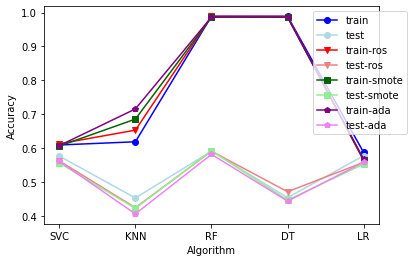

In [30]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
fig = plt.figure(facecolor=(1, 1, 1))
plt.plot(x_axes, scores_train.iloc[:, 0], label='train', marker='o', color='blue')
plt.plot(x_axes, scores_test.iloc[:, 0], label='test', marker='o', color='lightblue')
plt.plot(x_axes, scores_train.iloc[:, 1], label='train-ros', marker='v', color='red')
plt.plot(x_axes, scores_test.iloc[:, 1], label='test-ros', marker='v', color='lightcoral')
plt.plot(x_axes, scores_train.iloc[:, 2], label='train-smote', marker='s', color='darkgreen')
plt.plot(x_axes, scores_test.iloc[:, 2], label='test-smote', marker='s', color='lightgreen')
plt.plot(x_axes, scores_train.iloc[:, 3], label='train-ada', marker='p', color='purple')
plt.plot(x_axes, scores_test.iloc[:, 3], label='test-ada', marker='p', color='violet')

plt.legend(bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
fig.savefig('Train_Test_Score_Strat2.png', dpi=300)
plt.show()

**Classification reports for each class**

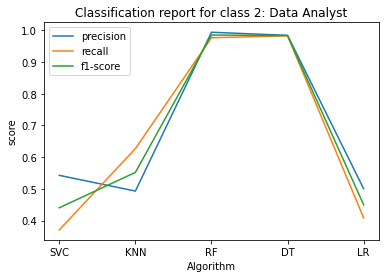

In [31]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 0], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 0], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 0], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 2: Data Analyst')
plt.show()

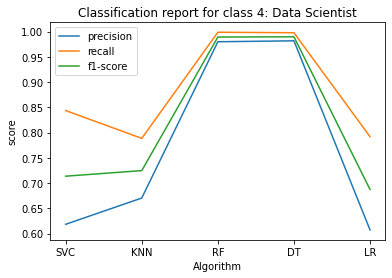

In [32]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 1], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 1], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 1], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 4: Data Scientist')
plt.show()

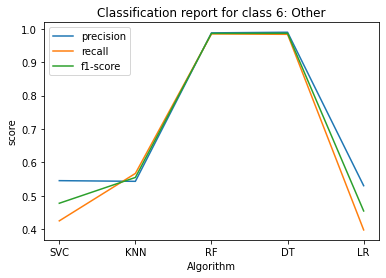

In [33]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 2], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 2], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 2], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 6: Other')
plt.show()

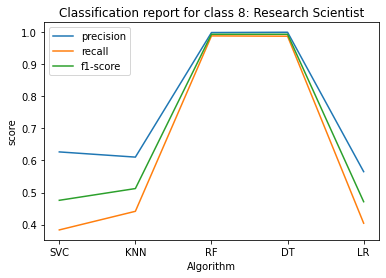

In [34]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 3], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 3], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 3], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 8: Research Scientist')
plt.show()

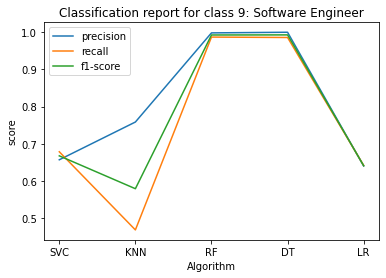

In [35]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 4], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 4], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 4], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 9: Software Engineer')
plt.show()

## Stratified KFold Crossvalidation

In [36]:
#Without resampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.553284 (0.013455)
KNN: 0.449219 (0.016387)
DT: 0.442172 (0.019387)
RF: 0.583647 (0.015633)
SVM: 0.572615 (0.018695)


In [37]:
#Random Oversampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_ro, y_ro, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.546171 (0.012481)
KNN: 0.583709 (0.012962)
DT: 0.803324 (0.010662)
RF: 0.856825 (0.006999)
SVM: 0.591724 (0.011085)


Decision Tree and Random Forest show the best performances, with Random Forest being slightly ahead.
In the next step, we search for the best hyperparameters in a random forest model.

**Parameter Tuning for the RandomForest model**

In [38]:
rf = RandomForestClassifier()
param_grid = {'max_features': ['sqrt', 'log2', 'None'], 
             'n_estimators': [10, 50, 100, 250, 500, 1000],
             'min_samples_leaf': [1, 3, 5]}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]},
             scoring='accuracy')

In [39]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5843284430797224
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}
RandomForestClassifier(n_estimators=1000)


**Training the RandomForest model with the best parameters**

In [40]:
rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=1, n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Train score:', rf.score(X_train, y_train))
print('Test score:', accuracy_score(y_test,y_pred))
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print('_'*80)
print('classification report:', classification_report(y_test,y_pred))

Train score: 0.9893096781530764
Test score: 0.5967246673490276
Confusion matrix: [[ 64  50  21   1  20]
 [ 19 292   7   4  25]
 [ 22  33  64  13  22]
 [  7  50  17  35  14]
 [ 13  35  12   9 128]]
________________________________________________________________________________
classification report:               precision    recall  f1-score   support

           2       0.51      0.41      0.46       156
           4       0.63      0.84      0.72       347
           6       0.53      0.42      0.47       154
           8       0.56      0.28      0.38       123
           9       0.61      0.65      0.63       197

    accuracy                           0.60       977
   macro avg       0.57      0.52      0.53       977
weighted avg       0.59      0.60      0.58       977



On the test data, the model only reaches ~60%.

# PCA
We try to optimize the performance by using PCA for dimension reduction

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)

pca = PCA(n_components=0.95) #select number of components while preserving 95% of variability
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [44]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, target, test_size=0.10, 
                                                    random_state=2)

In [45]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
train_score_pca = []
test_score_pca= []
class_report_pca = pd.DataFrame()

for name, model in models:
    model.fit(X_train_pca, y_train)
    train_accuracy= accuracy_score(y_train, model.predict(X_train_pca))
    train_score_pca.append((name,train_accuracy))
    y_pred = model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_pca.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_pca = class_report_pca.append(class_report.iloc[:3,:9])
results_pca_train = pd.DataFrame(train_score_pca, columns = ['Model', 'Pca_train'])
results_pca_test = pd.DataFrame(test_score_pca, columns = ['Model', 'Pca_test'])
results_pca = pd.merge(results_pca_train, results_pca_test, on='Model')
results_pca

,Model,Pca_train,Pca_test
0,LR,0.586603,0.531218
1,KNN,0.620039,0.461617
2,DT,0.989537,0.392016
3,RF,0.989537,0.524053
4,SVM,0.735699,0.563971


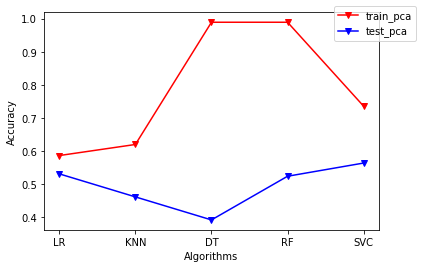

In [46]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
fig = plt.figure(facecolor=(1, 1, 1))
plt.plot(x_axes, results_pca.iloc[:, 1], label='train_pca', marker='v', color='red')
plt.plot(x_axes, results_pca.iloc[:, 2], label='test_pca', marker='v', color='blue')
plt.legend(bbox_to_anchor=(0.85, 1.05))
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
fig.savefig('Train_Test_Score_Strat2_pca.png', dpi=300)
plt.show()

In [47]:
class_report_pca

,2,4,6,8,9,accuracy,macro avg,weighted avg
precision,0.480000,0.580499,0.436090,0.405941,0.587571,0.531218,0.498020,0.520940
recall,0.402685,0.709141,0.358025,0.338843,0.565217,0.531218,0.474782,0.531218
f1-score,0.437956,0.638404,0.393220,0.369369,0.576177,0.531218,0.483025,0.522141
precision,0.300493,0.605333,0.383886,0.263889,0.543103,0.461617,0.419341,0.468117
recall,0.409396,0.628809,0.500000,0.157025,0.342391,0.461617,0.407524,0.461617
f1-score,0.346591,0.616848,0.434316,0.196891,0.420000,0.461617,0.402929,0.456282
precision,0.253425,0.574468,0.296296,0.193277,0.402062,0.392016,0.343906,0.399702
recall,0.248322,0.523546,0.345679,0.190083,0.423913,0.392016,0.346309,0.392016
f1-score,0.250847,0.547826,0.319088,0.191667,0.412698,0.392016,0.344425,0.395048
precision,0.404762,0.540395,0.523810,0.411765,0.561111,0.524053,0.488368,0.504931


In [48]:
rf=RandomForestClassifier()
rf.fit(X_train_pca, y_train)
train_accuracy= accuracy_score(y_train, rf.predict(X_train_pca))
y_pred = rf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test,y_pred)
print('Train Score pca :', train_accuracy)
print('Test Score pca :', test_accuracy)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Train Score pca : 0.9895371318093938
Test Score pca : 0.5199590583418628
Confusion matrix: [[ 34  73  21   3  18]
 [ 13 300  11   6  31]
 [ 18  53  54   9  28]
 [  6  69  14  21  11]
 [  7  60  14   4  99]]


In [49]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [50]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.523826173341586
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 5, 'n_estimators': 500}
Best estimator: RandomForestClassifier(min_samples_leaf=5, n_estimators=500)


In [51]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 3, n_estimators = 500, random_state=0)
rf.fit(X_train_pca, y_train)
train_accuracy= accuracy_score(y_train, rf.predict(X_train_pca))
y_pred = rf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test,y_pred)
print('Train Score pca :', train_accuracy)
print('Test Score pca :', test_accuracy)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Train Score pca : 0.9868076879335835
Test Score pca : 0.5424769703172978
Confusion matrix: [[ 34  79  16   2  18]
 [  5 322   9   5  20]
 [  9  60  60   7  26]
 [  6  75  11  17  12]
 [  3  68  12   4  97]]


In [52]:
print('classification report:', classification_report(y_test,y_pred))

classification report:               precision    recall  f1-score   support

           2       0.60      0.23      0.33       149
           4       0.53      0.89      0.67       361
           6       0.56      0.37      0.44       162
           8       0.49      0.14      0.22       121
           9       0.56      0.53      0.54       184

    accuracy                           0.54       977
   macro avg       0.55      0.43      0.44       977
weighted avg       0.55      0.54      0.50       977



In [53]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 5, n_estimators = 500, random_state=0)
rf.fit(X_train_pca, y_train)
train_accuracy= accuracy_score(y_train, rf.predict(X_train_pca))
y_pred = rf.predict(X_test_pca)
test_accuracy = accuracy_score(y_test,y_pred)
print('Train Score pca :', train_accuracy)
print('Test Score pca :', test_accuracy)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Train Score pca : 0.970772205163198
Test Score pca : 0.5383828045035824
Confusion matrix: [[ 32  85  14   1  17]
 [  4 317   9   6  25]
 [  7  58  66   2  29]
 [  6  77  11  15  12]
 [  3  69  13   3  96]]


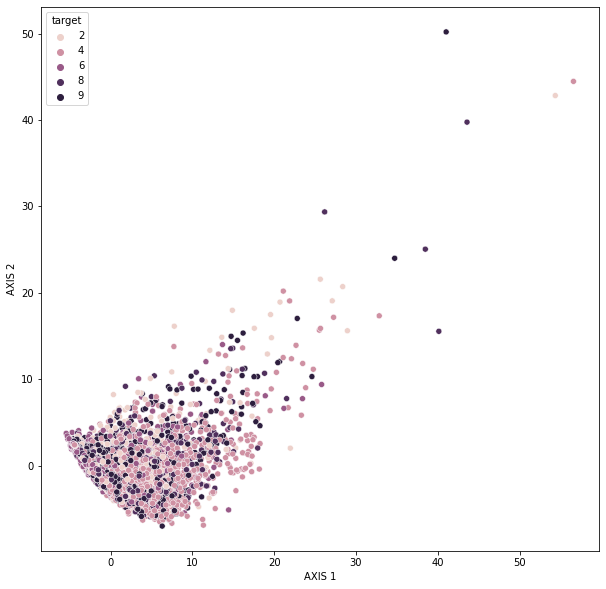

In [54]:
PCA_mat = pd.DataFrame(
    {'AXIS 1': X_pca[:, 0], 'AXIS 2': X_pca[:, 1], 'target': target})

plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXIS 1', y='AXIS 2', hue=target, data=PCA_mat)
plt.show()

## Boosting techniques

**XGBoost**

In [12]:
import xgboost as xgb

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [14]:
xg_class = xgb.XGBClassifier(objective="multi:softmax", num_class=5)

The target variable needs to start from 0 for xgboost to work, so we use label encoding on it

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{2: 0, 4: 1, 6: 2, 8: 3, 9: 4}


In [17]:
xg_class.fit(X_train,y_train)
#train_accuracy = accuracy_score(y_train, model.predict(X_train))
preds = xg_class.predict(X_test)
test_accuracy = accuracy_score(y_test,preds)
print('Test score : ',test_accuracy)

Test score :  0.044012282497441144


We try to improve performance using GridSearch

In [18]:
param_grid = {
    "max_depth": [5, 7, 10],
    "learning_rate": [0.1, 0.3, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "subsample": [0.8],
    "colsample_bytree": [0.5, 0.7]
}

scoring = 'accuracy'

xgb_class = xgb.XGBClassifier()
grid_cv = GridSearchCV(xgb_class, param_grid, n_jobs=-1, cv=3, scoring=scoring)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.3, 0.05],
                         'max_depth': [5, 7, 10], 'reg_lambda': [0, 1, 10],
                         'subsample': [0.8]},
             scoring='accuracy')

In [19]:
grid_cv.best_score_

0.6088787673899839

Performance greatly improved, but is still not as good as desired (>75%).

In [20]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 10,
 'reg_lambda': 10,
 'subsample': 0.8}

In [21]:
xg_class = xgb.XGBClassifier(colsample_bytree=0.5, gamma= 0, learning_rate=0.05,max_depth= 10, reg_lambda=10, subsample = 0.8)
xg_class.fit(X_train,y_train)
preds = xg_class.predict(X_test)
print('Test score:',accuracy_score(y_test,preds))


Test score: 0.044012282497441144


**AdaBoost**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

# Initiate a random forest model
rf = RandomForestClassifier(max_depth=5, n_estimators=500)
rf.fit(X_train, y_train)

from sklearn.ensemble import AdaBoostClassifier

ac = AdaBoostClassifier(base_estimator=rf, n_estimators=500)
ac.fit(X_train, y_train)
ac.score(X_test, y_test)

0.5542476970317298

Accuracy score is greatly improved to 55%

In [23]:
y_pred = ac.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,2,4,6,8,9
True,,,,,
2,113,80,46,8,29
4,57,475,40,36,54
6,60,59,157,38,55
8,9,73,41,110,23
9,28,71,51,13,228
